In [49]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.__version__)
print(np.__version__)

1.5.3
1.25.2


In [50]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target, dtype = str)
iris_df['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype='category')
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,group
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


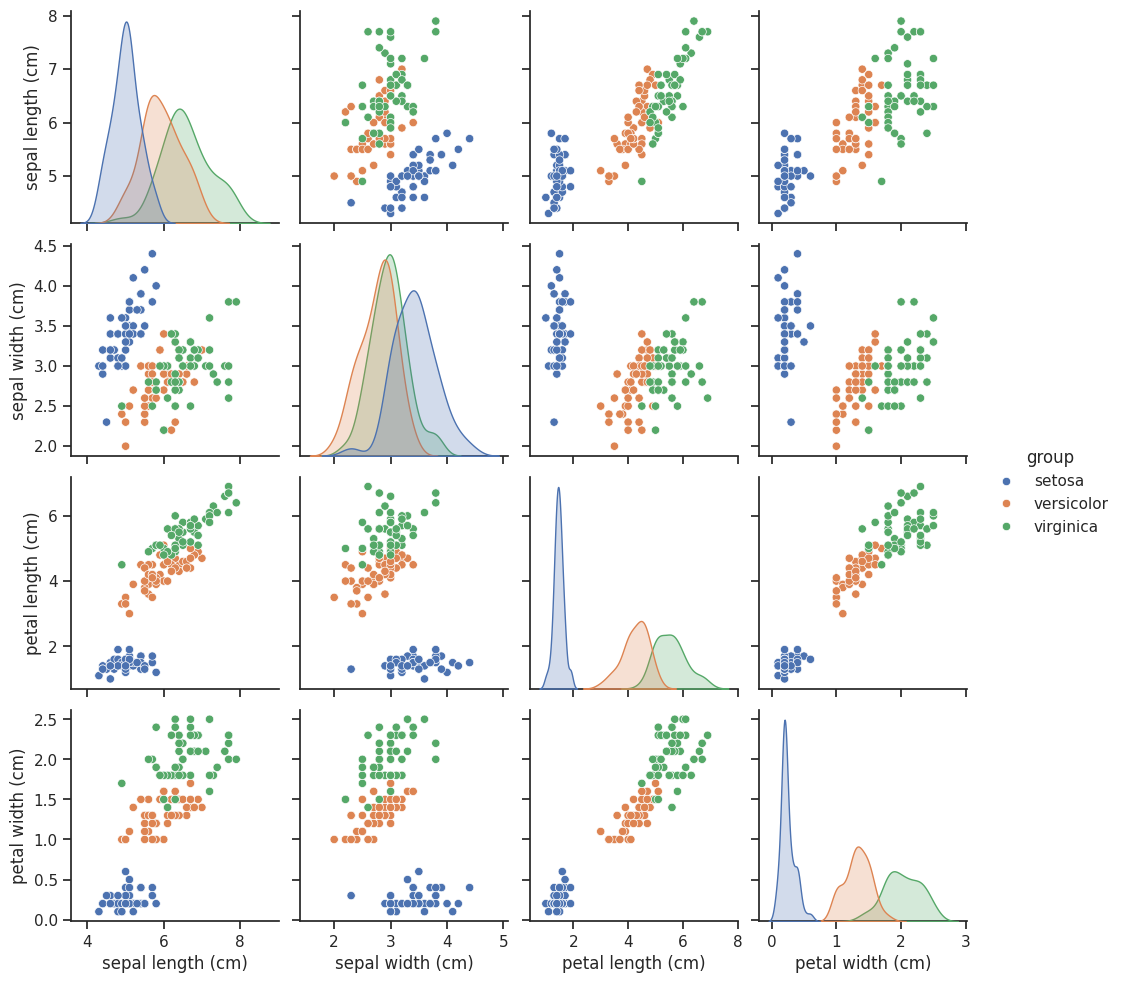

In [52]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(iris_df, hue="group")

<ipython-input-53-982bdf6a96d7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


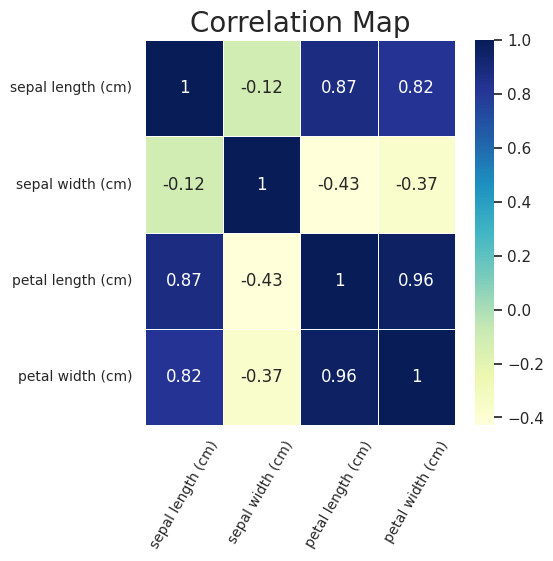

In [53]:
import seaborn as sns; sns.set()

def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (5, 5)})
        sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.7)  # тепловая карта коррелляций
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlated_map(iris_df[iris_df.columns], plot=True)

### Пара зависимых переменных: petal lenght и petal width

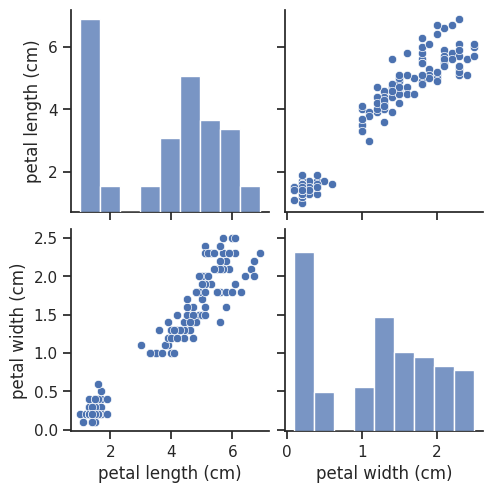

In [54]:
sns.set_theme(style="ticks")
sns.pairplot(iris_df[['petal length (cm)', 'petal width (cm)']])

In [139]:
petal = iris_df[['petal length (cm)','petal width (cm)']]
petal

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [140]:
petal.set_index("petal length (cm)", inplace=True)
petal

,petal width (cm)
petal length (cm),
1.4,0.2
1.4,0.2
1.3,0.2
1.5,0.2
1.4,0.2
...,...
5.2,2.3
5.0,1.9
5.2,2.0


In [141]:
petal.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 1.4 to 5.1
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   petal width (cm)  150 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [142]:
X = petal.index.values.reshape(-1, 1)
xx = np.linspace(petal.index.min(), petal.index.max(), 100).reshape(-1, 1)
print(X.shape, xx.shape)

(150, 1) (100, 1)


Вес признаков:  [0.41575542] Член смещения:  -0.3630755213190291


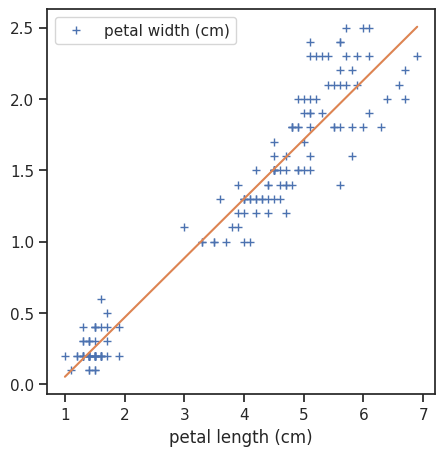

In [143]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X, petal['petal width (cm)'])

print('Вес признаков: ', linear.coef_, 'Член смещения: ', linear.intercept_)

a = linear.coef_[0]
b = linear.intercept_

petal.plot(style='+')
plt.plot(xx, a * xx + b)
plt.show()

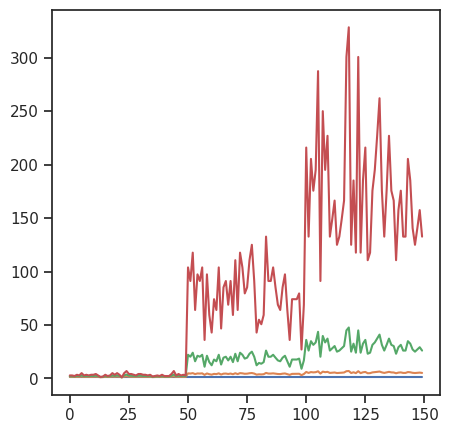

In [150]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x2 = poly.fit_transform(X)
plt.plot(x2)

In [151]:
model2 = LinearRegression().fit(x2, petal['petal width (cm)'])
model2.coef_

array([ 0.        , -0.66092067,  0.30855328, -0.02610327])

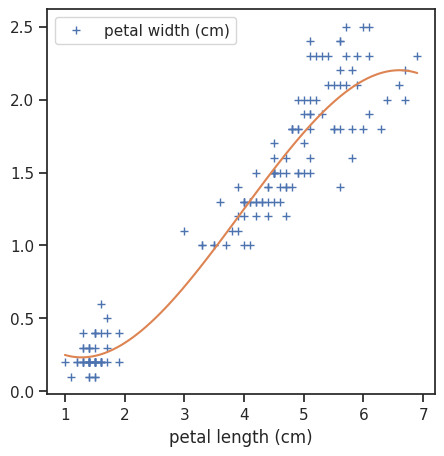

In [152]:
petal.plot(style='+')
xx2 = poly.transform(xx.reshape(-1, 1))
plt.plot(xx, model2.predict(xx2))
plt.show()

array([ 0.00000000e+00, -5.63966693e+02,  1.15105502e+03, -1.35852300e+03,
        1.03408462e+03, -5.36002523e+02,  1.94567948e+02, -4.99879806e+01,
        9.04661589e+00, -1.12752784e+00,  9.20708363e-02, -4.43159383e-03,
        9.52611506e-05])

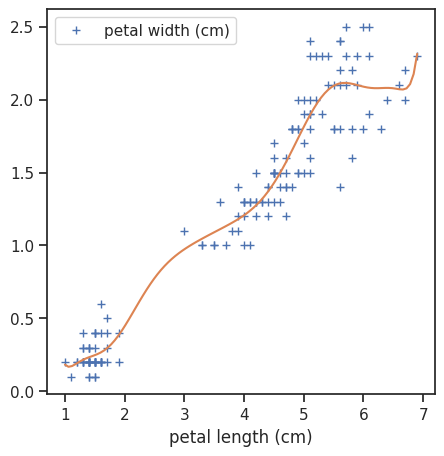

In [153]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=12)),
                  ('linear', LinearRegression())])

model.fit(X, petal['petal width (cm)'])
petal.plot(style='+')
plt.plot(xx, model.predict(xx))
model['linear'].coef_

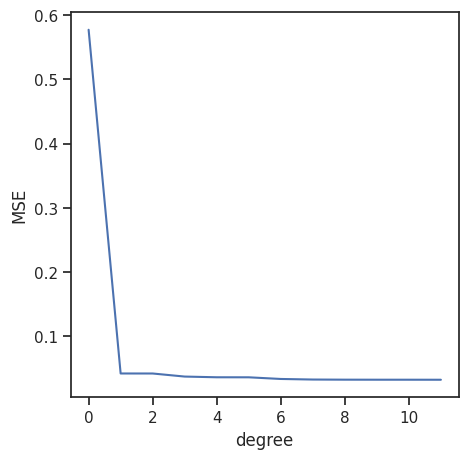

In [155]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

score=[]
X_ = petal.index.values.reshape(-1, 1)

for n in range(12):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                  ('linear', LinearRegression())])
  model.fit(X_, petal['petal width (cm)'])
  score.append(mean_squared_error(petal['petal width (cm)'], model.predict(X_)))

plt.plot(score)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

array([0.        , 0.41575542])

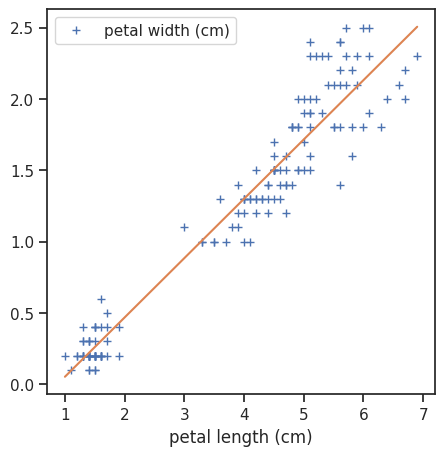

In [157]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)), # линейная регресия лучше всего описывает данные
                  ('linear', LinearRegression())])

model.fit(X, petal['petal width (cm)'])
petal.plot(style='+')
plt.plot(xx, model.predict(xx))
model['linear'].coef_

Кроссвалидация

In [158]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(32, test_size=2)
cv

ShuffleSplit(n_splits=32, random_state=None, test_size=2, train_size=None)

In [159]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [160]:
from sklearn.model_selection import cross_val_score

score = pd.DataFrame(columns=['mean', 'std'])

for n in range(14):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression())])
  sc = cross_val_score(model, X, petal['petal width (cm)'], cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]

score

,mean,std
0,0.533060,0.387049
1,0.046085,0.066363
2,0.032052,0.038344
3,0.027186,0.033261
4,0.036310,0.041034
5,0.040197,0.037623
6,0.035433,0.026207
7,0.039024,0.044343
8,0.042380,0.047086
9,0.023642,0.026322


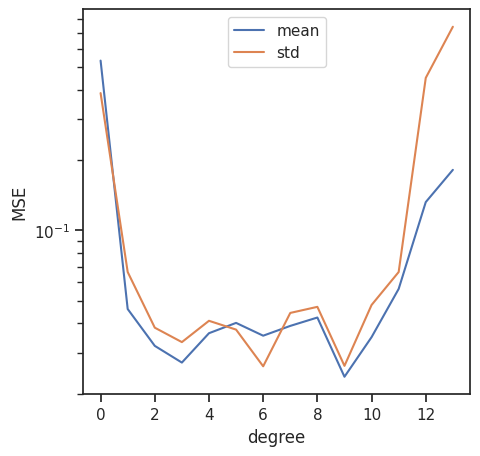

In [161]:
score.plot(logy=True)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

0.0236417768359429

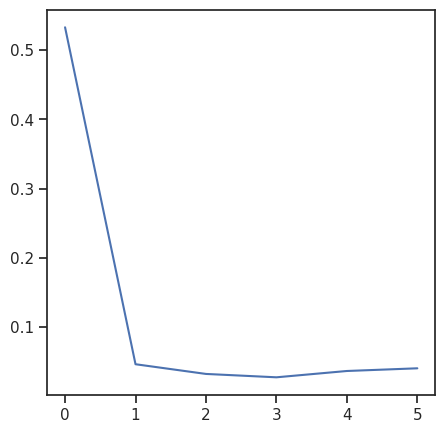

In [162]:
score[:6]['mean'].plot()
score['mean'].min()

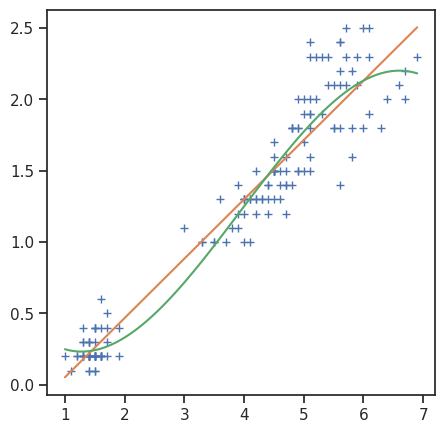

In [164]:
plt.plot(X, petal['petal width (cm)'], '+')

plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression())]).fit(X, petal['petal width (cm)']).predict(xx))

plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())]).fit(X, petal['petal width (cm)']).predict(xx))

plt.show()

### Пара независимых переменных: petal lenght и sepal width

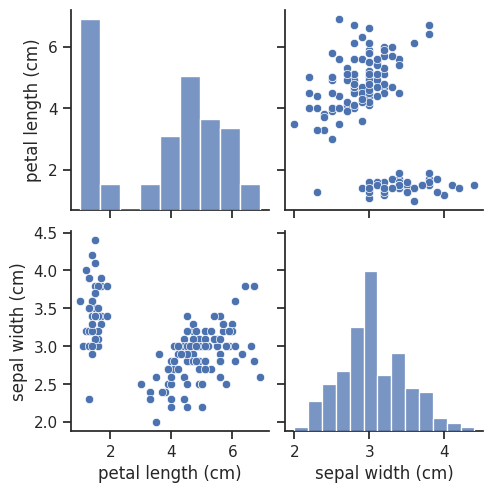

In [165]:
sns.set_theme(style="ticks")
sns.pairplot(iris_df[['petal length (cm)', 'sepal width (cm)']])

In [166]:
data = iris_df[['petal length (cm)','sepal width (cm)']]
data

,petal length (cm),sepal width (cm)
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2
3,1.5,3.1
4,1.4,3.6
...,...,...
145,5.2,3.0
146,5.0,2.5
147,5.2,3.0
148,5.4,3.4


In [167]:
data.set_index("petal length (cm)", inplace=True)
data

,sepal width (cm)
petal length (cm),
1.4,3.5
1.4,3.0
1.3,3.2
1.5,3.1
1.4,3.6
...,...
5.2,3.0
5.0,2.5
5.2,3.0


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 1.4 to 5.1
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal width (cm)  150 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [169]:
X = data.index.values.reshape(-1, 1)
xx = np.linspace(data.index.min(), data.index.max(), 100).reshape(-1, 1)
print(X.shape, xx.shape)

(150, 1) (100, 1)


Вес признаков:  [-0.1057853] Член смещения:  3.4548744766780657


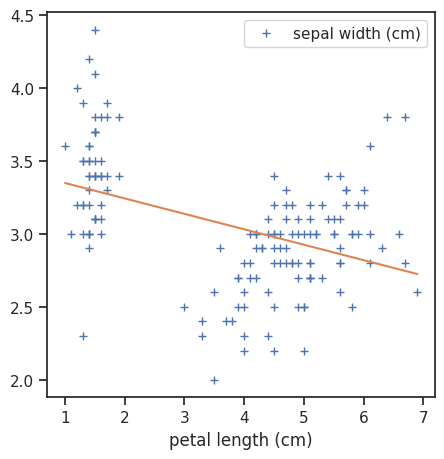

In [170]:
linear = LinearRegression()
linear.fit(X, data['sepal width (cm)'])

print('Вес признаков: ', linear.coef_, 'Член смещения: ', linear.intercept_)

a = linear.coef_[0]
b = linear.intercept_

data.plot(style='+')
plt.plot(xx, a * xx + b)
plt.show()

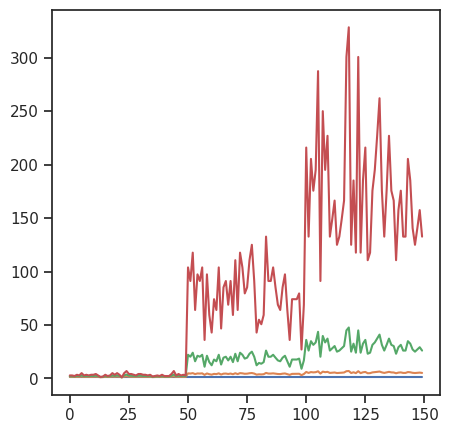

In [171]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x2 = poly.fit_transform(X)
plt.plot(x2)

In [172]:
model2 = LinearRegression().fit(x2, data['sepal width (cm)'])
model2.coef_

array([ 0.        , -1.42585812,  0.28908281, -0.01703207])

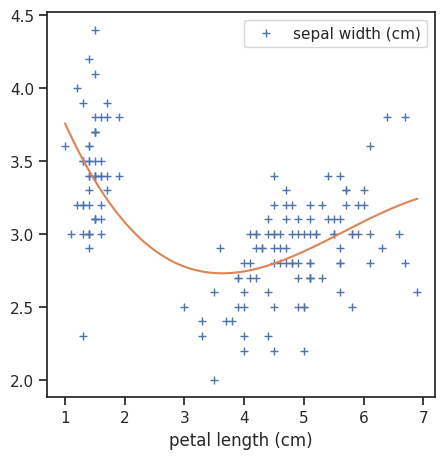

In [173]:
data.plot(style='+')
xx2 = poly.transform(xx.reshape(-1, 1))
plt.plot(xx, model2.predict(xx2))
plt.show()

array([ 0.00000000e+00, -1.64696792e+03,  3.16837850e+03, -3.54299396e+03,
        2.56453602e+03, -1.26575018e+03,  4.37064693e+02, -1.06546036e+02,
        1.82384259e+01, -2.14337686e+00,  1.64574548e-01, -7.43151115e-03,
        1.49592961e-04])

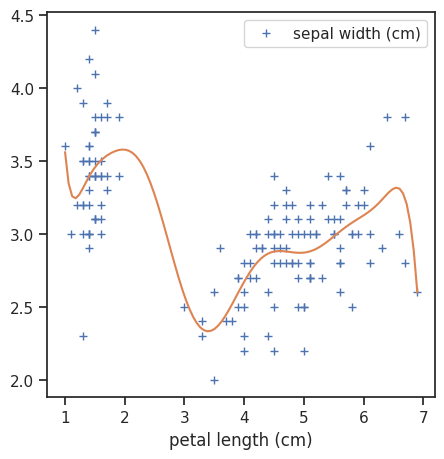

In [174]:
model = Pipeline([('poly', PolynomialFeatures(degree=12)),
                  ('linear', LinearRegression())])

model.fit(X, data['sepal width (cm)'])
data.plot(style='+')
plt.plot(xx, model.predict(xx))
model['linear'].coef_

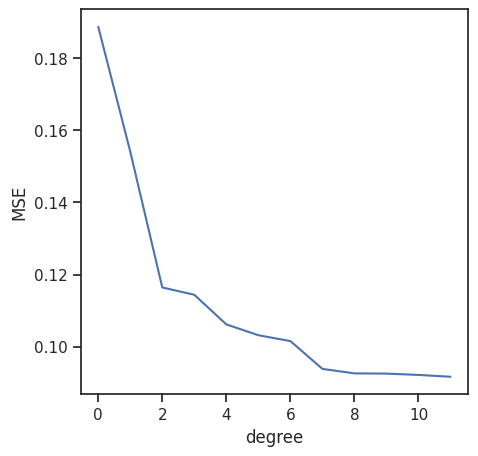

In [175]:
score=[]
X_ = data.index.values.reshape(-1, 1)

for n in range(12):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                  ('linear', LinearRegression())])
  model.fit(X_, data['sepal width (cm)'])
  score.append(mean_squared_error(data['sepal width (cm)'], model.predict(X_)))

plt.plot(score)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

array([ 0.00000000e+00, -5.06711976e+01,  5.71498072e+01, -3.24903436e+01,
        1.01288637e+01, -1.75781524e+00,  1.59402532e-01, -5.88892245e-03])

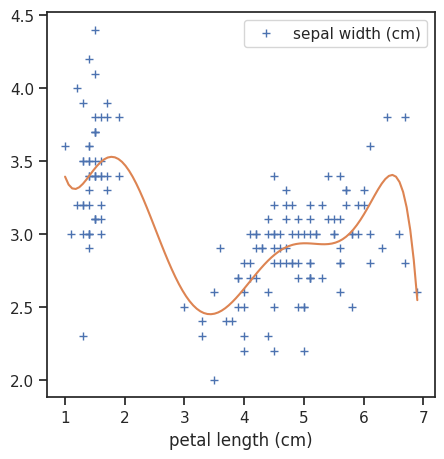

In [176]:
model = Pipeline([('poly', PolynomialFeatures(degree=7)), # полином 7 степени лучше всего описывает данные
                  ('linear', LinearRegression())])

model.fit(X, data['sepal width (cm)'])
data.plot(style='+')
plt.plot(xx, model.predict(xx))
model['linear'].coef_

Кроссвалидация

In [177]:
from sklearn.model_selection import cross_val_score

score = pd.DataFrame(columns=['mean', 'std'])

for n in range(14):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression())])
  sc = cross_val_score(model, X, data['sepal width (cm)'], cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]

score

,mean,std
0,0.242793,0.179569
1,0.187118,0.217170
2,0.160086,0.135496
3,0.098318,0.109464
4,0.107485,0.118695
5,0.085374,0.066984
6,0.127244,0.124357
7,0.078845,0.091196
8,0.095836,0.093136
9,0.083346,0.096256


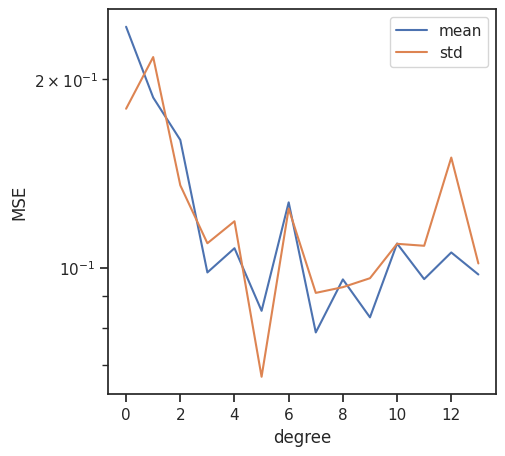

In [178]:
score.plot(logy=True)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

0.07884545651300665

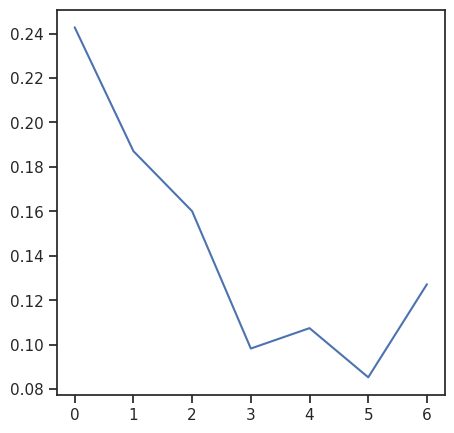

In [180]:
score[:7]['mean'].plot()
score['mean'].min()

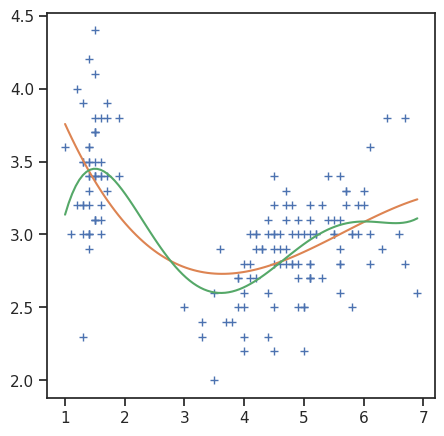

In [181]:
plt.plot(X, data['sepal width (cm)'], '+')

plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())]).fit(X, data['sepal width (cm)']).predict(xx))

plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression())]).fit(X, data['sepal width (cm)']).predict(xx))

plt.show()

#### № 2

In [187]:
df = iris_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [188]:
df.set_index("petal length (cm)", inplace=True)
df

,sepal length (cm),sepal width (cm),petal width (cm)
petal length (cm),,,
1.4,5.1,3.5,0.2
1.4,4.9,3.0,0.2
1.3,4.7,3.2,0.2
1.5,4.6,3.1,0.2
1.4,5.0,3.6,0.2
...,...,...,...
5.2,6.7,3.0,2.3
5.0,6.3,2.5,1.9
5.2,6.5,3.0,2.0


In [189]:
from sklearn.model_selection import cross_val_score

score = pd.DataFrame(columns=['mean', 'std'])

for n in range(14):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression())])
  sc = cross_val_score(model, X, df[["sepal length (cm)", "sepal width (cm)", "petal width (cm)"]], cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]

score

,mean,std
0,0.503045,0.309790
1,0.132115,0.098571
2,0.110247,0.059426
3,0.124116,0.083149
4,0.089677,0.058786
5,0.108937,0.077223
6,0.091405,0.063641
7,0.090834,0.043149
8,0.099293,0.081760
9,0.106382,0.088823


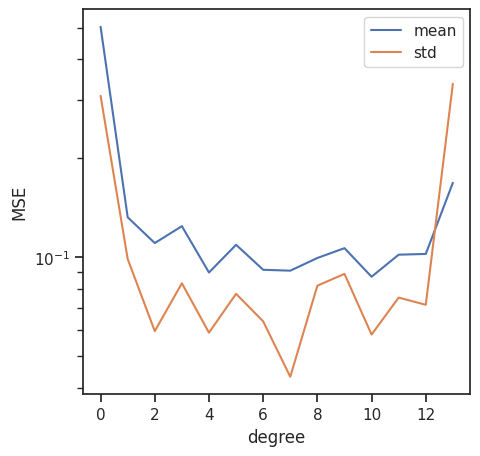

In [190]:
score.plot(logy=True) # no
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

0.08704724750554073

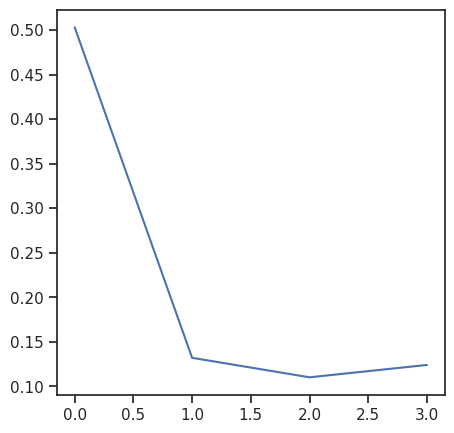

In [192]:
score[:4]['mean'].plot()
score['mean'].min()

Применить логистическую регрессию для классификации цветков ириса

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [239]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [240]:
X = df[df['target'] != 3][['petal length (cm)', 'petal width (cm)']]
y = df[df['target'] != 3]['target']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [243]:
y_pred = model.predict(X_test)

In [244]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


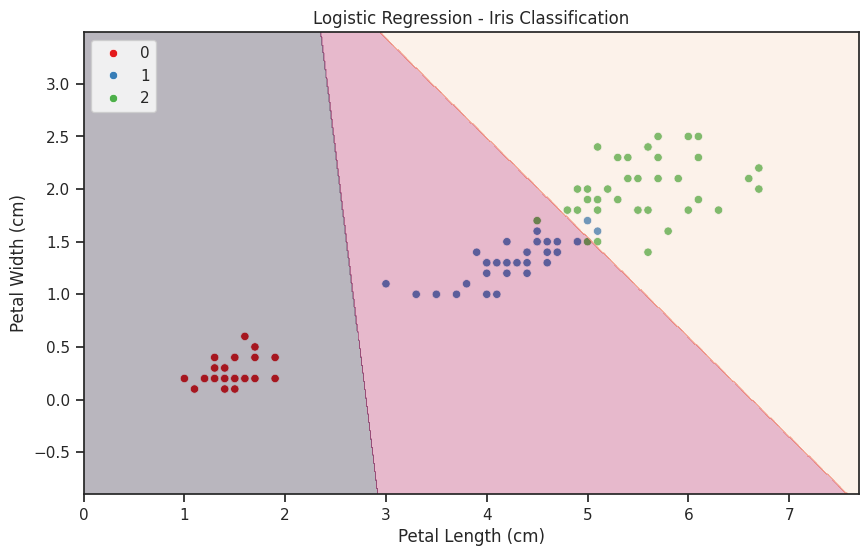

In [245]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=X_train, hue=y_train, palette='Set1')

# Добавление границ решения модели на график
x_min, x_max = X_train['petal length (cm)'].min() - 1, X_train['petal length (cm)'].max() + 1
y_min, y_max = X_train['petal width (cm)'].min() - 1, X_train['petal width (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Logistic Regression - Iris Classification')
plt.legend(loc='upper left')
plt.show()